<h3>Name: K. D. S. D. Kuruppu</h3>
<h3>Index no: 190338C</h3>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

(-0.5, 284.5, 177.5, -0.5)

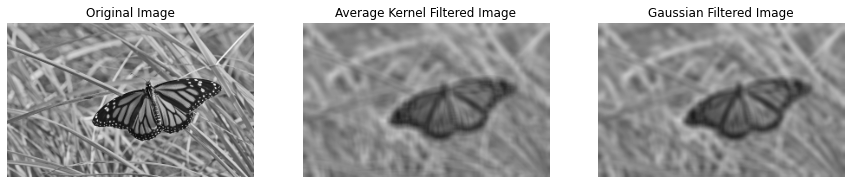

In [103]:
#Q1
butterfly_img = cv.imread(r"Images\butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_4)

average_filter = np.ones((9,9), np.float32)/81
avg_filtered_butterfly_img = cv.filter2D(butterfly_img, -1, average_filter)
gaussian_filtered_butterfly_img = cv.GaussianBlur(butterfly_img, (9,9), 4)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(butterfly_img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(avg_filtered_butterfly_img, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title("Average Kernel Filtered Image")
ax[1].axis("off")

ax[2].imshow(gaussian_filtered_butterfly_img, cmap='gray', vmin = 0, vmax = 255)
ax[2].set_title("Gaussian Filtered Image")
ax[2].axis("off")

(-0.0029999999999778966, 0.0015915508218553866)

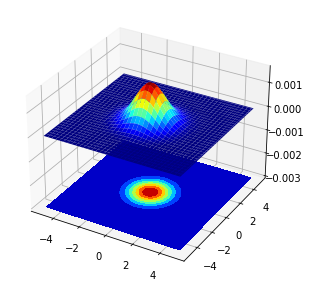

In [143]:
#Q2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.axis("off")
ax = fig.add_subplot(111, projection = "3d")

step = 0.1
X = np.arange(-5, 5+step, step)
Y = np.arange(-5, 5+step, step)
XX, YY = np.meshgrid(X, Y)

sigma = 1
gaussian_dist = np.exp(- ( (XX**2 + YY**2) / sigma**2 ) * 0.5 ) 
gaussian_dist /= np.sum(gaussian_dist)

ax.plot_surface(XX, YY, gaussian_dist, cmap = cm.jet)
ax.contourf(XX, YY, gaussian_dist, zdir = "z", offset = np.min(gaussian_dist) - 0.003, cmap = cm.jet)
ax.set_zlim(np.min(gaussian_dist) - 0.003, np.max(gaussian_dist))


(-0.5, 936.5, 931.5, -0.5)

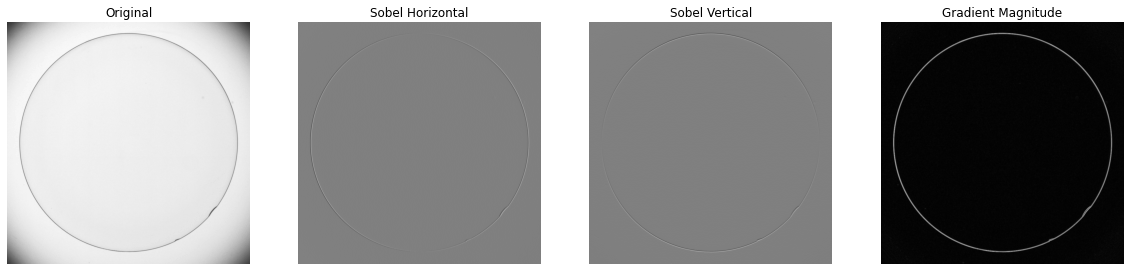

In [67]:
#Q3
contact_lense_img = cv.imread(r"Images\contact_lens.tif", cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_vertical = np.array([ [-1, -2, -1],[0, 0 , 0], [1, 2, 1] ], dtype=np.float32);
sobel_horizontal = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ], dtype=np.float32)

vertical_gradient_img = cv.filter2D(contact_lense_img, -1, sobel_horizontal)
horizontal_gradient_img = cv.filter2D(contact_lense_img, -1, sobel_vertical) 
grad_magnitude_img = ( vertical_gradient_img ** 2 + horizontal_gradient_img ** 2 ) ** 0.5

fig2, ax2 = plt.subplots(1, 4, figsize=(20, 10))

ax2[0].imshow(contact_lense_img, cmap = "gray", vmin = 0, vmax = 255)
ax2[0].set_title("Original")
ax2[0].axis("off")

ax2[1].imshow(vertical_gradient_img, cmap = "gray", vmin = -1020, vmax = 1020)
ax2[1].set_title("Sobel Horizontal")
ax2[1].axis("off")

ax2[2].imshow(horizontal_gradient_img, cmap = "gray", vmin = -1020, vmax = 1020)
ax2[2].set_title("Sobel Vertical")
ax2[2].axis("off")

ax2[3].imshow(grad_magnitude_img, cmap = "gray")
ax2[3].set_title("Gradient Magnitude")
ax2[3].axis("off")

(-0.5, 709.5, 472.5, -0.5)

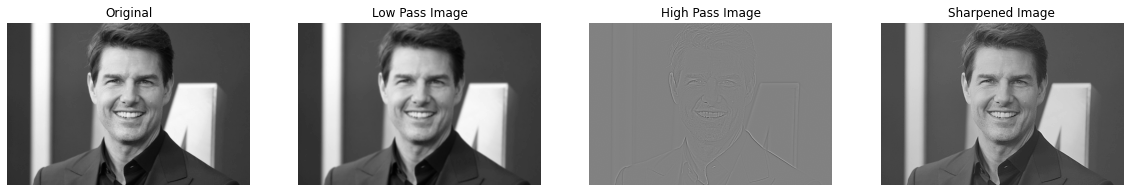

In [149]:
#Q4
tom_img = cv.imread(r"Images\tom.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma = 2
gaussian_1d = cv.getGaussianKernel(5, sigma)

low_pass_tom_img = cv.sepFilter2D(tom_img, -1, gaussian_1d, gaussian_1d)
edges_tom_img = tom_img - low_pass_tom_img
sharpened_tom_img = ( tom_img + edges_tom_img )

fig3, ax3 = plt.subplots(1, 4, figsize=(20, 10))

ax3[0].imshow(tom_img, cmap = "gray")
ax3[0].set_title("Original")
ax3[0].axis("off")

ax3[1].imshow(low_pass_tom_img, cmap = "gray")
ax3[1].set_title("Low Pass Image")
ax3[1].axis("off")

ax3[2].imshow(edges_tom_img, cmap = "gray")
ax3[2].set_title("High Pass Image")
ax3[2].axis("off")

ax3[3].imshow(sharpened_tom_img, cmap = "gray")
ax3[3].set_title("Sharpened Image")
ax3[3].axis("off")
